# SIMPLE LINEAR REGRESSION

In [1]:
#import libraries for ml 
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
#loading data in to pandas dataframe
df=pd.read_csv("FuelConsumptionCo2.csv")
df.head() #first five rows
df.tail() #last five rows
len(df) #total rows
df.columns #columns names
df['MODELYEAR'] #specific column
df[['MODELYEAR','MAKE']] #multiple columns
df[66:73] #slicing specing rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
66,2014,AUDI,TTS COUPE QUATTRO,SUBCOMPACT,2.0,4,A6,Z,11.5,8.8,10.3,27,237
67,2014,AUDI,TTS ROADSTER QUATTRO,TWO-SEATER,2.0,4,A6,Z,11.5,8.8,10.3,27,237
68,2014,BENTLEY,CONTINENTAL GT,SUBCOMPACT,4.0,8,AS8,Z,15.4,9.8,12.9,22,297
69,2014,BENTLEY,CONTINENTAL GT,SUBCOMPACT,6.0,12,AS8,Z,18.8,11.5,15.5,18,356
70,2014,BENTLEY,CONTINENTAL GT CONVERTIBLE,SUBCOMPACT,4.0,8,AS8,Z,16.8,10.3,13.9,20,320
71,2014,BENTLEY,CONTINENTAL GT SPEED CONVERTIBLE,SUBCOMPACT,6.0,12,AS8,Z,20.0,12.2,16.5,17,380
72,2014,BENTLEY,CONTINENTAL GTC,SUBCOMPACT,4.0,8,AS8,Z,16.7,10.6,14.0,20,322


In [3]:
df.describe() #for data exploration

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


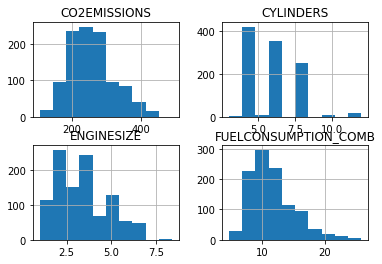

In [4]:
features=df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.hist()#plotting histogram
plt.show() #show the histogeram

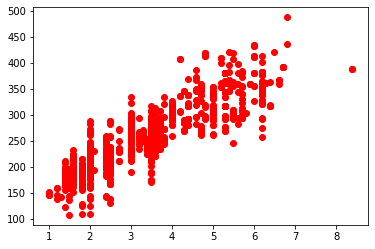

In [5]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color="red")#plotting scatter plot for enginesize vs co2emissions
plt.show()

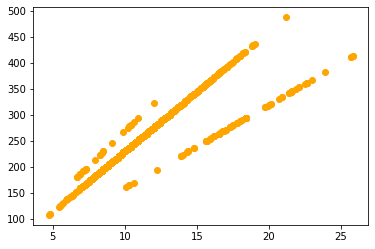

In [6]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS,color="orange")#plotting scatter plot for FC vd CO2
plt.show()

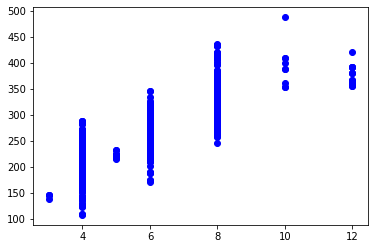

In [7]:
plt.scatter(df["CYLINDERS"],df['CO2EMISSIONS'],color="blue")#PLOTTING SCATTER PLOT FOR CYLINDERS VS CO2
plt.show()

# CREATING TRAIN AND TEST DATASET

In [8]:
mask=np.random.rand(len(df)) < 0.8
train=features[mask]#train dataset
test=features[~mask]# test dataset but both are exclusive datasets
print(train)
print(test)

      CYLINDERS  ENGINESIZE  FUELCONSUMPTION_COMB  CO2EMISSIONS
0             4         2.0                   8.5           196
1             4         2.4                   9.6           221
2             4         1.5                   5.9           136
4             6         3.5                  10.6           244
5             6         3.5                  10.0           230
...         ...         ...                   ...           ...
1060          6         3.0                  11.5           264
1063          6         3.2                  11.5           264
1064          6         3.0                  11.8           271
1065          6         3.2                  11.3           260
1066          6         3.2                  12.8           294

[857 rows x 4 columns]
      CYLINDERS  ENGINESIZE  FUELCONSUMPTION_COMB  CO2EMISSIONS
3             6         3.5                  11.1           255
8             6         3.7                  11.6           267
10            4 

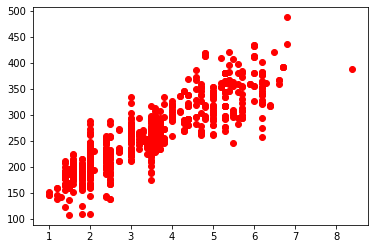

In [9]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')#scatter plot for train enginesize vs co2emissions 
plt.show()

# MODELING

In [13]:
from sklearn import linear_model #import linearmodle from scikit learn library
regr=linear_model.LinearRegression() #import linear regeression model
train_x=np.asanyarray(train[['ENGINESIZE']]) #converting train_X into array
train_y=np.asanyarray(train[['CO2EMISSIONS']])#converting train)y into array
regr.fit(train_x,train_y)
print('Coefiicients',regr.coef_)
print('Intercept',regr.intercept_)

# y=a+bx  so y=123.87090112+39.60226175*x

Coefiicients [[39.60226175]]
Intercept [123.87910112]


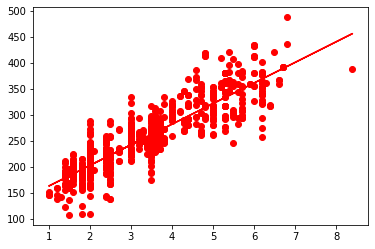

39.60226174520053


In [35]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'red')#best fit line
plt.show()
print(regr.coef_[0][0])

In [47]:
regr.predict([[6]]) #prediction of engine 6

array([[361.49267159]])

In [56]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_pre=regr.predict(test_x) #predict test x
print(test_y_pre[0:10],test_y[0:10]) #compare first ten predicted values and actual values 

[[262.48701723]
 [270.40746958]
 [218.92452931]
 [203.08362461]
 [203.08362461]
 [290.20860045]
 [329.8108622 ]
 [290.20860045]
 [242.68588636]
 [242.68588636]] [[255]
 [267]
 [225]
 [230]
 [214]
 [407]
 [409]
 [407]
 [262]
 [285]]


In [64]:
print(np.mean(np.absolute(test_y_pre-test_y)),"mean absolute error")
print(np.mean((test_y_pre-test_y)**2),"residual mean square error")
print(r2_score(test_y_pre,test_y),"r2 score")

25.219007651384764 mean absolute error
1132.1506607932301 residual mean square error
0.6249912602635699 r2 score
